![alt text](https://i.imgur.com/1WaY7aA.png)

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\DSIA-SYD-FT-Projects-201907\\Sarita\\Labs\\winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
wine_csv.shape

(6497, 13)

In [4]:
wine_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
wine_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
red_wine                6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [6]:
wine_csv.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [7]:
wine_csv.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [8]:
# Check Nulls
wine_csv.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

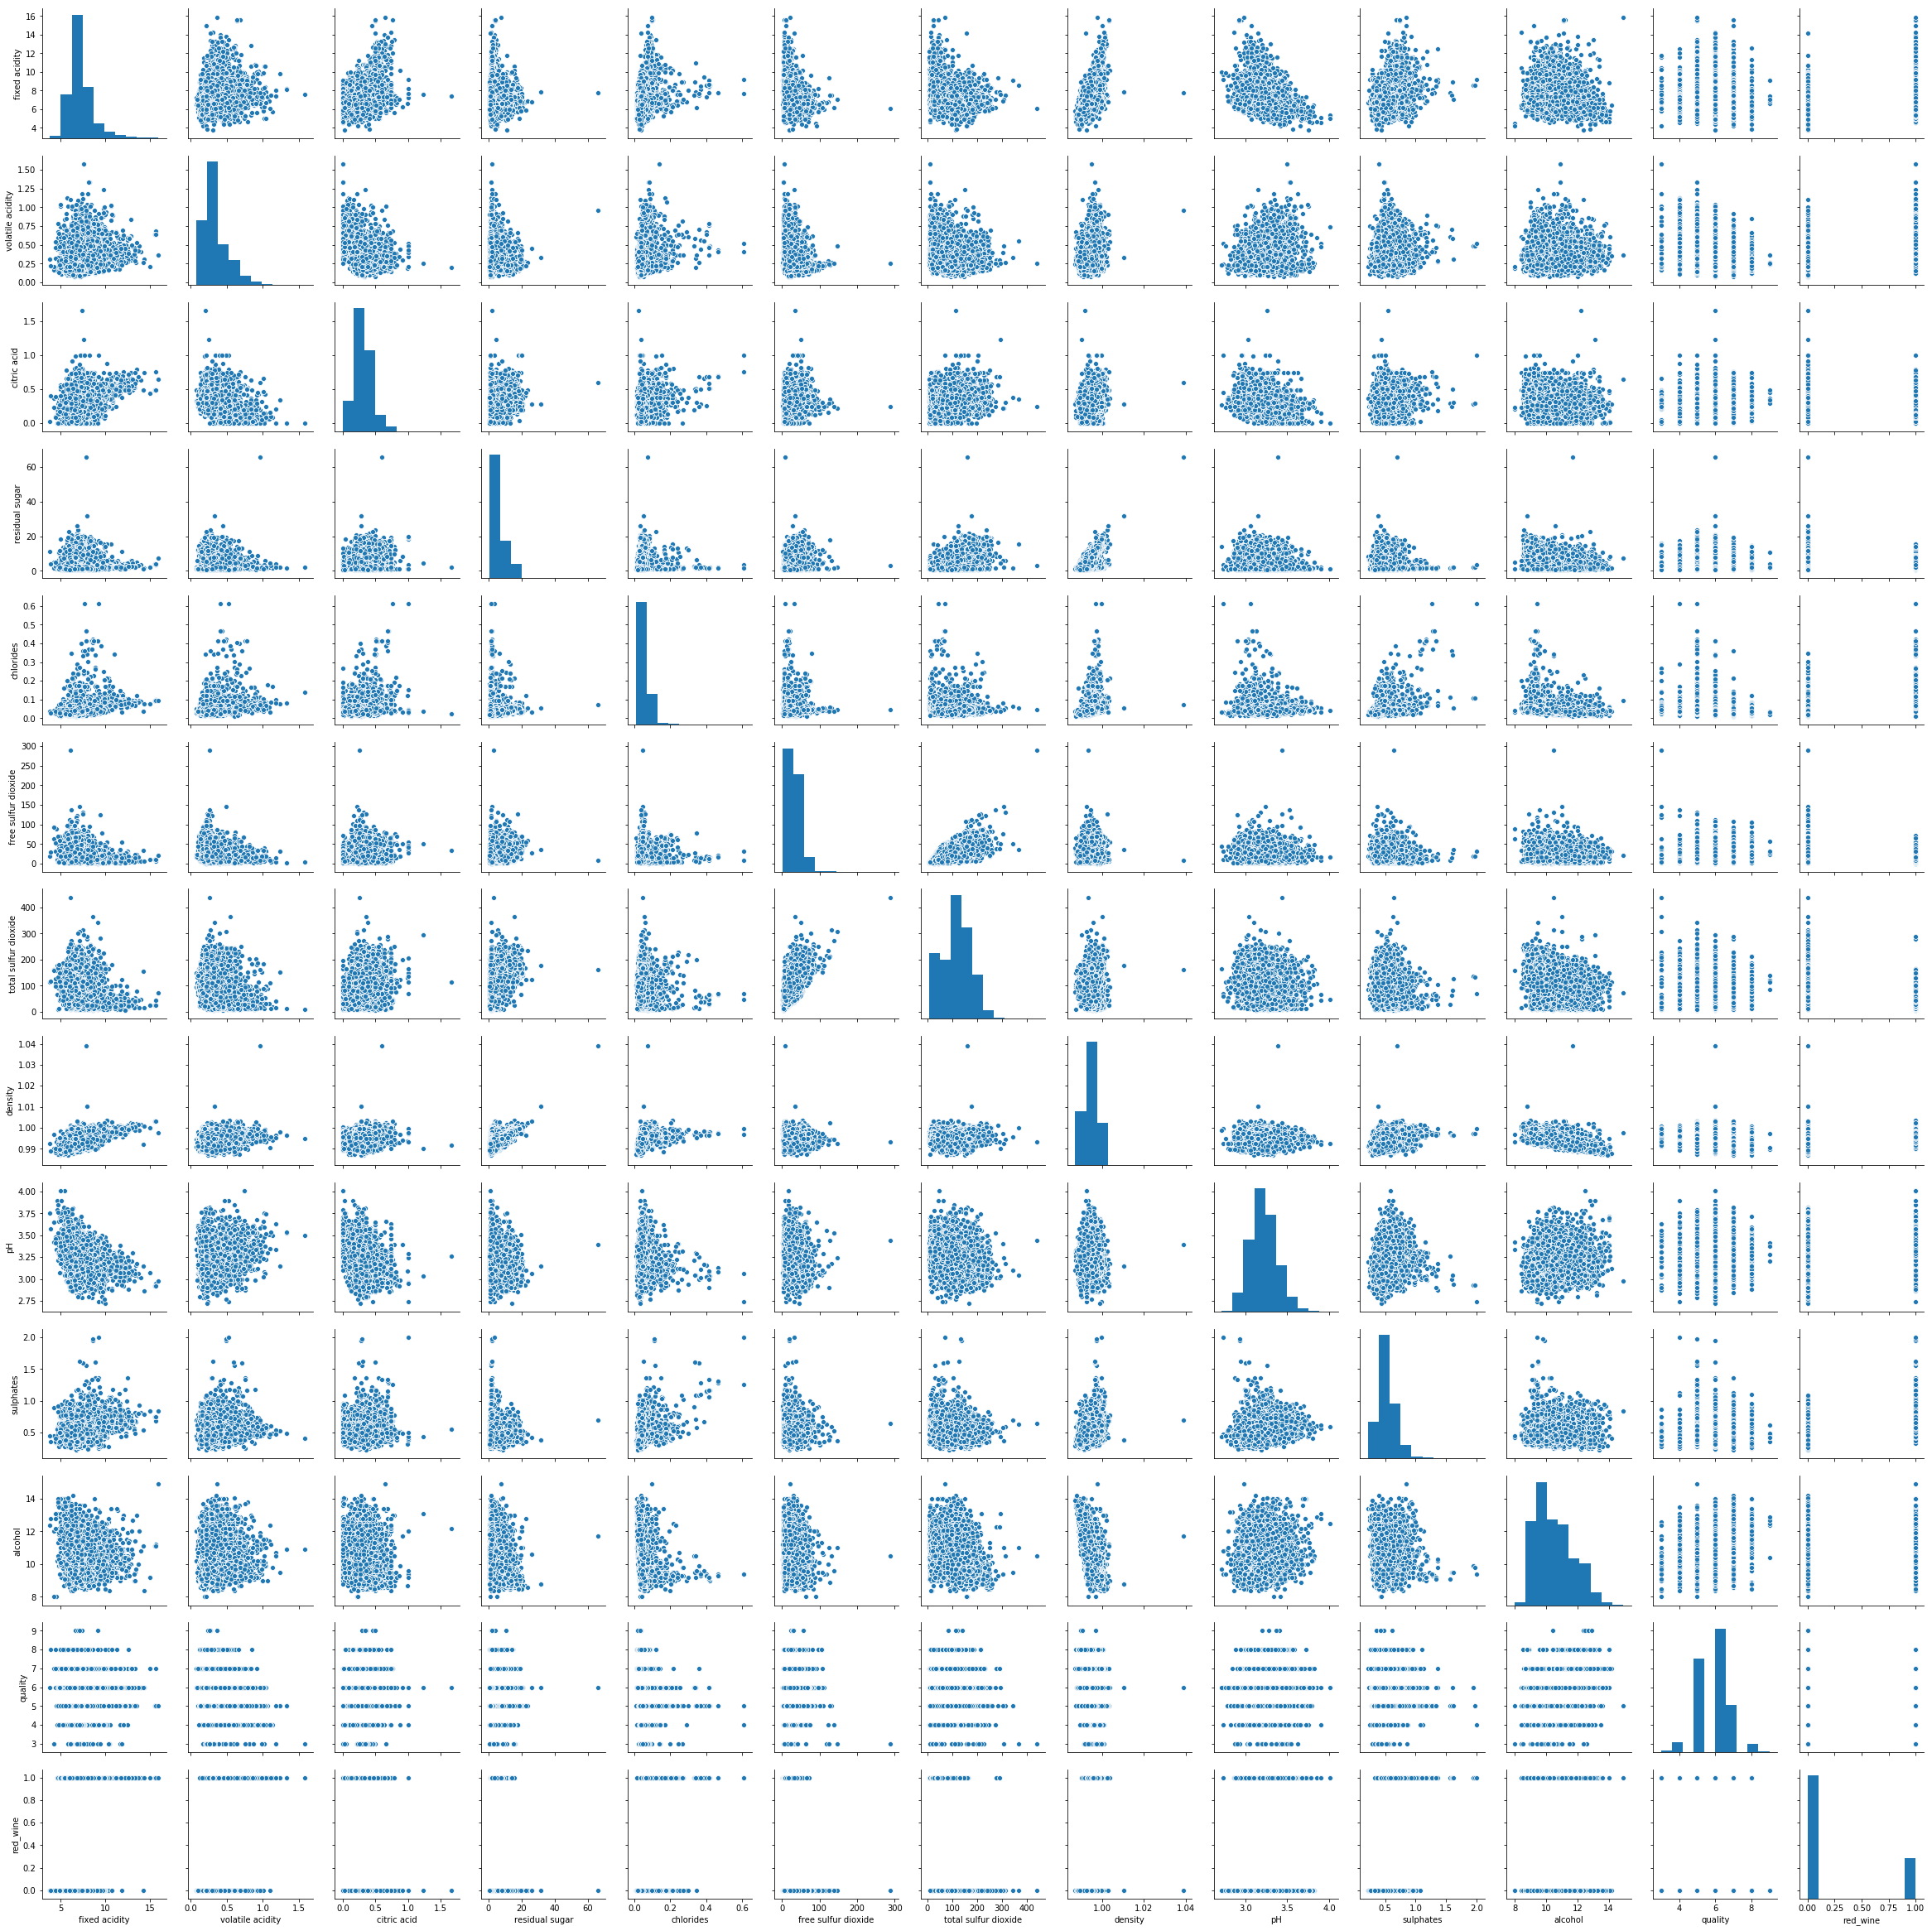

In [9]:
# Pairplot
sns.pairplot(wine_csv)

In [11]:
# Correlation
wine_csv_corr = wine_csv.corr()
wine_csv_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


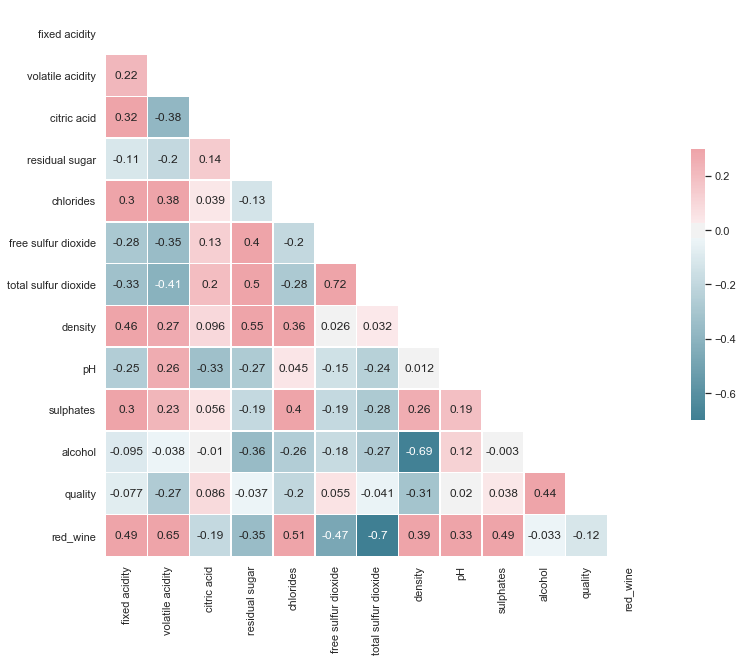

In [16]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(wine_csv_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(wine_csv_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 2. Set Target Variable

Create a target variable for wine quality.

In [17]:
# Target Variable
y = wine_csv['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [18]:
# Check correlation
wine_csv.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
red_wine               -0.119323
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
alcohol                 0.444319
rest are all 0.07,0.05 etc

In [20]:
# I chose the feature which are strogly correalted with quality
predictor_columns = ['density', 'volatile acidity', 'chlorides', 'alcohol']

In [21]:
X = wine_csv[predictor_columns]
X.head()

,density,volatile acidity,chlorides,alcohol
0,0.9978,0.70,0.076,9.4
1,0.9968,0.88,0.098,9.8
2,0.9970,0.76,0.092,9.8
3,0.9980,0.28,0.075,9.8
4,0.9978,0.70,0.076,9.4


In [ ]:
# ANSWER

### 4. Using Linear Regression Create a Model and Test Score

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [2]:
# Create a model for Linear Regression

# Fit the model with the Training data

# Calculate the score (R^2 for Regression) for Training Data

# Calculate the score (R^2 for Regression) for Testing Data

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.2707886547599646

In [25]:
lr.score(X_test, y_test)

0.2521354751304966

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

In [26]:
# Load the wine dataset from csv
wine = pd.read_csv('C:\\Users\\praty\\Documents\\DSIA\\DSIA-SYD-FT-Projects-201907\\Sarita\\Labs\\winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [27]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [31]:
X_train.shape[0]

5197

In [32]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = residual sugar, chlorides, sulphates, pH, density, alcohol, volatile acidity, free sulfur dioxide, total sulfur dioxide, red_wine, citric acid, fixed acidity
(Step) Trying residual sugar...
(Step) - Features = residual sugar
(Step) - Adjusted R^2: This = 0.000; Best = 0.000
(Step) - New Best!   : Feature = residual sugar; R^2 = 0.001; Adjusted R^2 = 0.000
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.040; Best = 0.000
(Step) - New Best!   : Feature = chlorides; R^2 = 0.040; Adjusted R^2 = 0.040
(Step) Trying sulphates...
(Step) - Features = sulphates
(Step) - Adjusted R^2: This = 0.000; Best = 0.040
(Step) Trying pH...
(Step) - Features = pH
(Step) - Adjusted R^2: This = -0.001; Best = 0.040
(Step) Trying density...
(Step) - Features = density
(Step) - Adjusted R^2: This = 0.091; Best = 0.040
(Step) - New Best!   : Feature = density; R^2 = 0.092; Adjusted R^2 = 0.091
(Step) Trying alcohol...
(Step) - Features = alcohol
(Step

(Step) - Adjusted R^2: This = 0.268; Best = 0.272
Added feature red_wine with R^2 = 0.275 and adjusted R^2 = 0.272

(Step) Excluded = chlorides, citric acid, density, total sulfur dioxide, free sulfur dioxide, pH, fixed acidity
(Step) Trying chlorides...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, chlorides
(Step) - Adjusted R^2: This = 0.273; Best = 0.272
(Step) - New Best!   : Feature = chlorides; R^2 = 0.276; Adjusted R^2 = 0.273
(Step) Trying citric acid...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, citric acid
(Step) - Adjusted R^2: This = 0.273; Best = 0.273
(Step) Trying density...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density
(Step) - Adjusted R^2: This = 0.277; Best = 0.273
(Step) - New Best!   : Feature = density; R^2 = 0.281; Adjusted R^2 = 0.277
(Step) Trying total sulfur dioxide...
(Step) - Features = alcohol, volatile acidity, sulphates, residual 

**Please continue with Lab 4.2.2 with the same dataset.**